

# Project: Investigate a Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb).The data set consists of movies released in the period between 1960 and 2015. Data points include:popularity, budget, original_title, cast, homepage,director, tagline, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj.
The goal is to explore the properties associated with movies that have high revenues.Alongside also observe which genres are most popular over the year period considered.

>The research questions are, Q1:_'Which genres are most popular from year to year?'_ and Q2:_'What kinds of properties are associated with movies that have high revenues?'_. 
>>For the first question the dependent variable is __popularity__ and the independent variables __genre__ and __year__.
For the second question the dependent variable is __revenue__ and for independent variables __budget__, __genre__ and __popularity__.



In [366]:
#  importing statements for all of the packages planning to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis, documenting each step.

### General Properties

In [367]:
# Load data and print out a few lines. Perform operations to inspect data types
# and look for instances of missing or possibly errant data.

dfm = pd.read_csv('tmdb-movies.csv')


In [368]:
#overview the dataset
dfm.head()




,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [369]:
#checking number of rows and columns
dfm.shape

(10866, 21)

In [370]:
#checking some statistics
dfm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [371]:
#checking the datatypes
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       




#### Data Cleaning -Removing duplicates, Removing Nan 

In [372]:
#check for duplicates
dfm.duplicated().sum()

1

In [373]:
#dedupe
dfm=dfm.drop_duplicates()

In [374]:
#verify dedupe sucess
dfm.duplicated().sum()

0

In [375]:
#check for null on the genres column, because I'm only interested in movies that have a genre associated with it
dfm['genres'].isnull().sum()

23

In [376]:
#stay only with the rows where genres is not Nan
dfm = dfm[dfm['genres'].notna()]

In [377]:
#verify that genres column is free of Nan values
dfm['genres'].isnull().sum()

0

In [476]:
#check for null values on the director column, but I'll keep as it is
dfm['director'].isnull().sum()

42

In [479]:
#checking null values on the revenue column
dfm['revenue'].isnull().sum()

0

In [378]:
# removing columns that are not considered relevant to answer our questions
dfn = dfm.drop(['vote_count','vote_average','cast','homepage','tagline','keywords','overview','imdb_id','id'],axis=1)

In [379]:
#overview of the new dataframe dfn after some columns were dropped
dfn.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09


In [380]:
#checking the content of column genres
dfn['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10842, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:  What genres are most popular from year to year?

> To answer the research question i'll:
>1. first split the all the  genres string on each row, into different rows
>2.then groupby release_year and genres and calculate the mean popularity 
>3.then check for the max mean popularity of the groupby above and plot it
>4. The histogram should illustrate which genre has the highest mean popularity for each year

In [381]:
#splitting into different rows each type of genres, because most movies have several genres associated with it
dfx = dfn.assign(genres = dfn['genres'].str.split('|')).explode('genres')
dfx.head(10)


,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08


In [382]:
dfx['original_title'].value_counts()

The Three Musketeers                  11
Annie                                 11
Journey to the Center of the Earth    10
Emma                                  10
Teenage Mutant Ninja Turtles          10
                                      ..
La Guerre des Miss                     1
The Hangover Part II                   1
Chelsea Peretti: One of the Greats     1
Relative Strangers                     1
A Civil Action                         1
Name: original_title, Length: 10548, dtype: int64

In [383]:
#what are all the genres associated with the movie 'The three musketeers'?
dfx.loc[dfx.original_title=='The Three Musketeers','genres']

3425     Adventure
3425        Action
3425      Thriller
3425        Comedy
10251       Action
10251    Adventure
10251       Comedy
10614       Action
10614    Adventure
10614       Comedy
10614        Drama
Name: genres, dtype: object

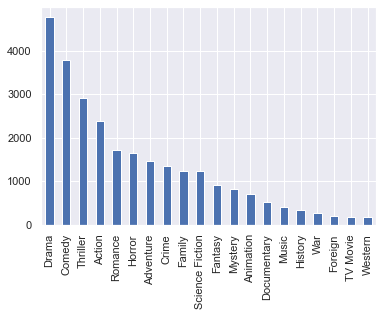

In [474]:
#for the all dataset what are the value counts for each genre type?
genresplot=dfx['genres'].value_counts().plot(kind='bar')

In [399]:
#For each each what are the value counts of each genre?
dfx.loc[:, ['release_year','genres']].value_counts()


release_year  genres  
2014          Drama       284
2015          Drama       260
2013          Drama       253
2008          Drama       233
2012          Drama       232
                         ... 
1978          Western       1
              Foreign       1
1968          Western       1
2002          Western       1
1984          TV Movie      1
Length: 1049, dtype: int64

In [337]:
#for each year get the average popularity for each genre type
dfx.groupby(['release_year','genres'], as_index=False)['popularity'].mean()

    

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346480
4,1960,Drama,0.566305
...,...,...,...
1044,2015,Science Fiction,2.245603
1045,2015,TV Movie,0.260574
1046,2015,Thriller,1.401877
1047,2015,War,1.284511


In [406]:
# for each year which genre had the highest average popularity
df=dfx.groupby(["release_year","genres"], as_index=False)["popularity"].mean()
df.head(20)



,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346480
4,1960,Drama,0.566305
5,1960,Family,0.278064
6,1960,Fantasy,0.428247
7,1960,Foreign,0.194948
8,1960,History,0.412364
9,1960,Horror,0.591450


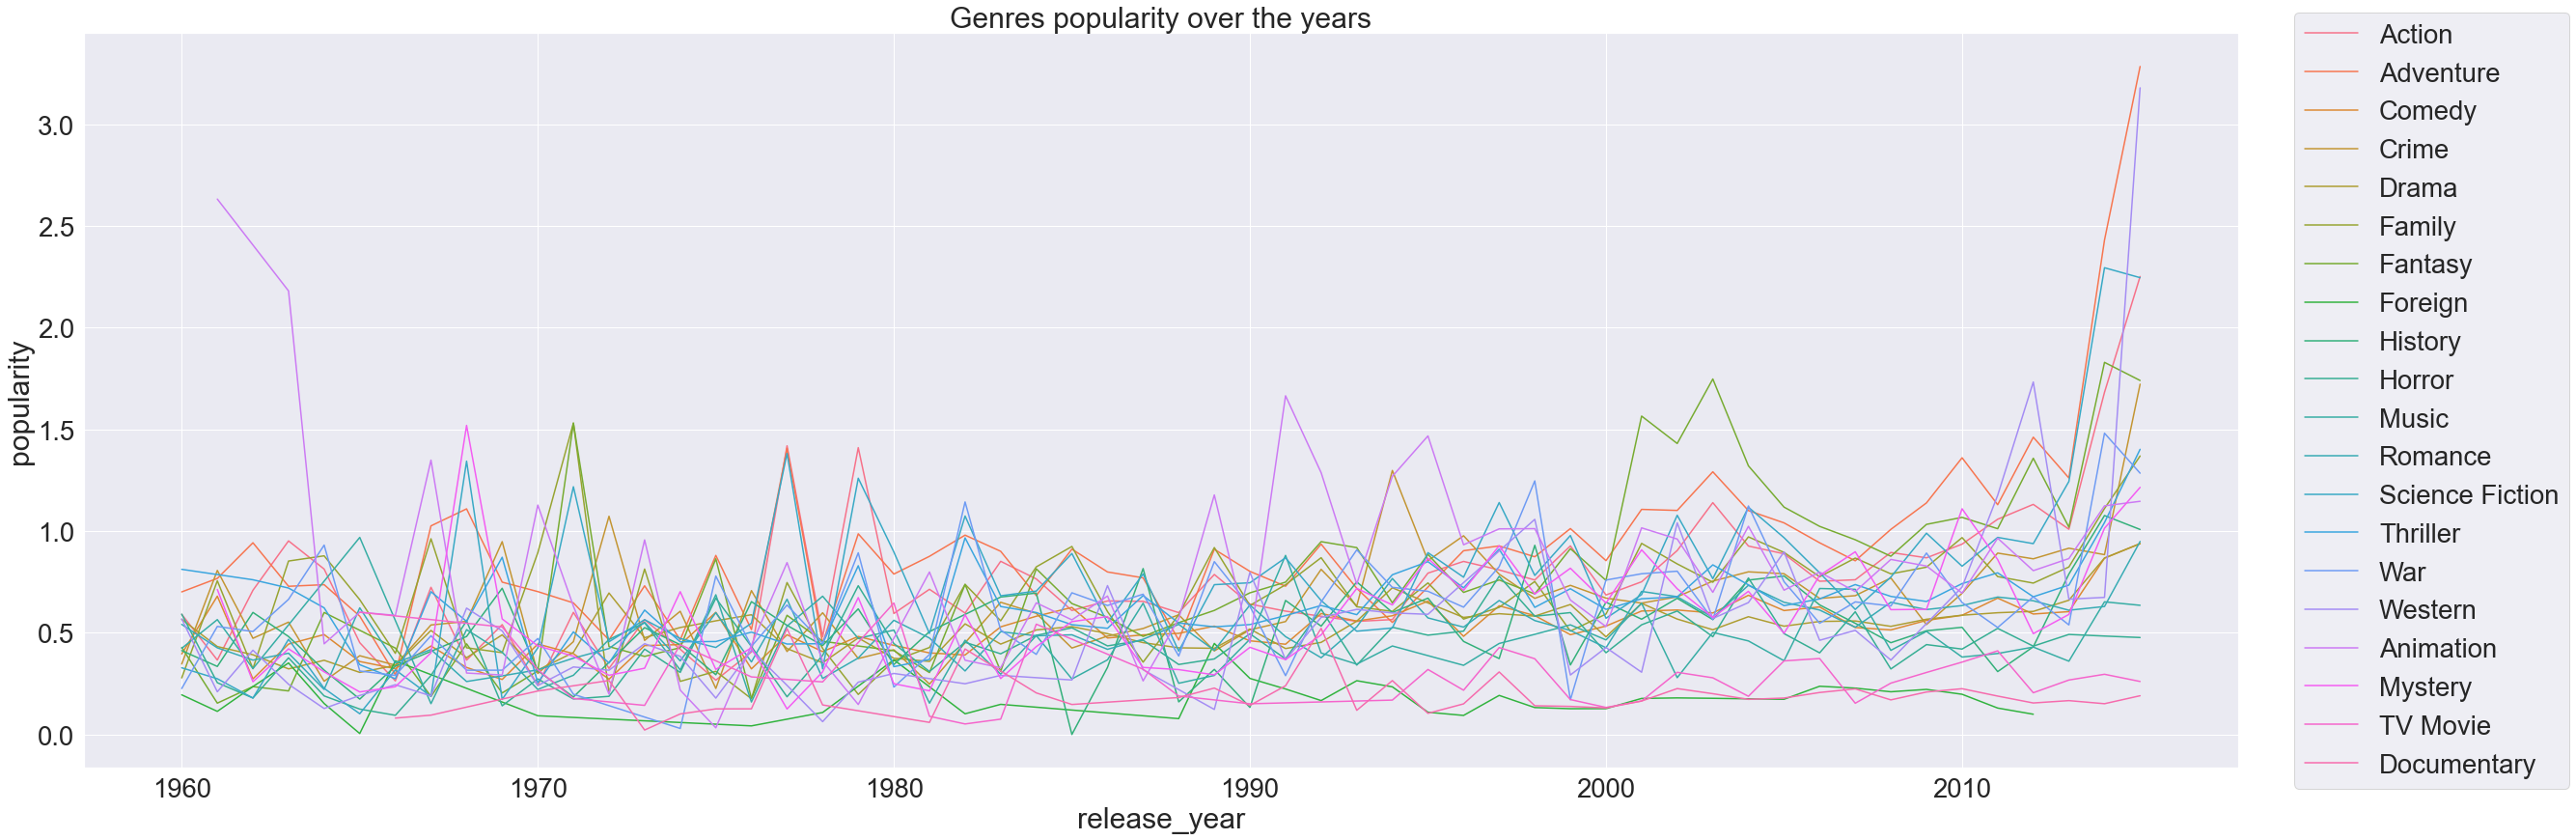

In [407]:
#curiosity, Plotting the genres popularity over the years

fig, ax = plt.subplots(figsize=(40,14))
ax.set_ylabel('popularity')
ax.set_title("Genres popularity over the years")
sns.lineplot(x='release_year', y='popularity', hue='genres', legend='brief',data=df, ax=ax)
ax.legend(bbox_to_anchor=(1.09, 0.5), loc=10)




In [408]:
#groupby genre with highest average popularity for each year
group=df.sort_values(['release_year','popularity'],ascending=[True, False]).drop_duplicates('release_year').reset_index(drop=True)
print(group)

    release_year           genres  popularity
0           1960         Thriller    0.811910
1           1961        Animation    2.631987
2           1962        Adventure    0.942513
3           1963        Animation    2.180410
4           1964              War    0.930959
5           1965            Music    0.968850
6           1966        Animation    0.585717
7           1967        Animation    1.348805
8           1968          Mystery    1.519456
9           1969            Crime    0.948020
10          1970        Animation    1.127718
11          1971           Family    1.530722
12          1972            Crime    1.072768
13          1973        Animation    0.956526
14          1974          Mystery    0.702035
15          1975        Adventure    0.880297
16          1976            Crime    0.707249
17          1977           Action    1.419319
18          1978            Music    0.679805
19          1979           Action    1.410014
20          1980  Science Fiction 

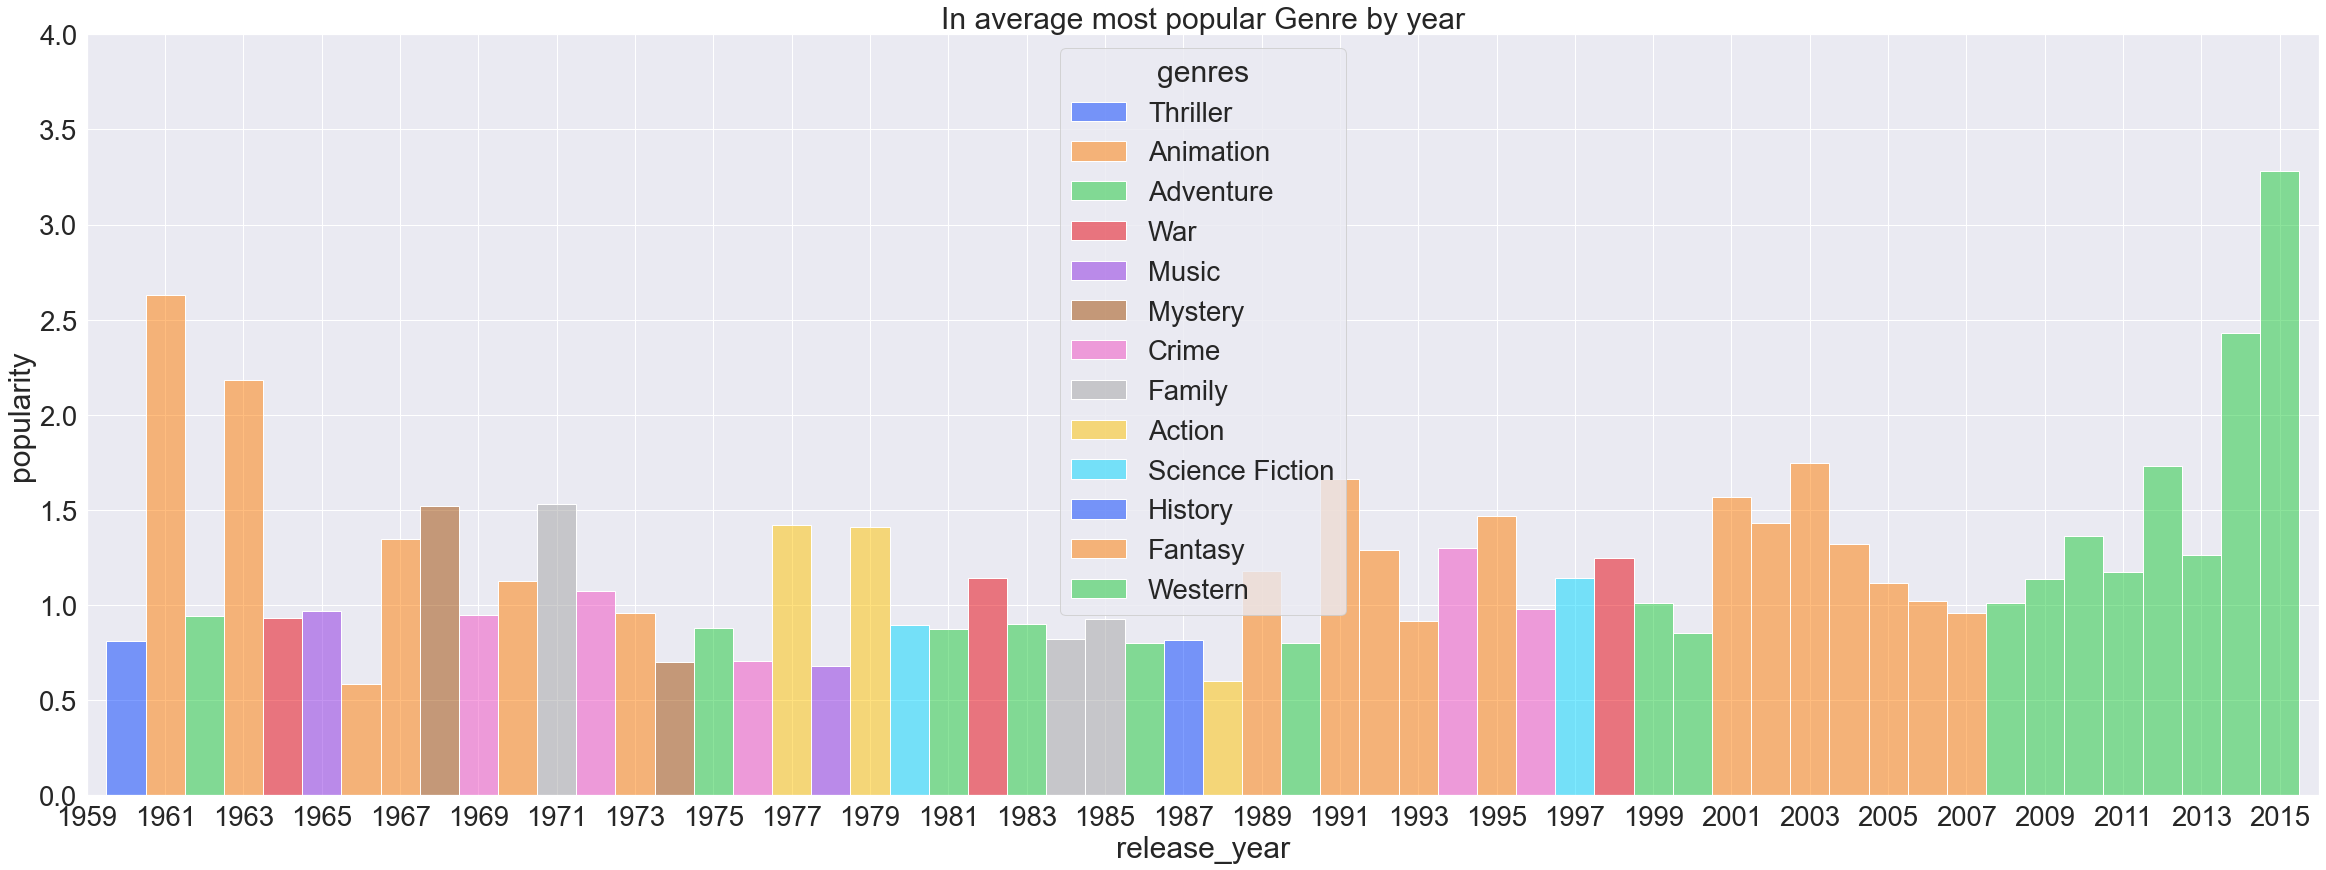

In [409]:
#Histogram with "In average most popular genre by year"

fig, ax = plt.subplots(figsize=(40,14))
ax.set_ylabel('popularity')
ax.set_title("In average most popular Genre by year")

p=sns.histplot(data=group, x='release_year',hue="genres",palette='bright', weights='popularity', bins=56, discrete=True,ax=ax)
p.set(xlim=(1959,2016),ylim=(0,4))
ax.set_xticks(range(1959,2016,2))
sns.set_theme()
sns.set_context("notebook", font_scale=2.5)



In [423]:
#Most popular movie for the period of time considered
maxpopularity=dfx["popularity"].max()
dfx.query('popularity== @maxpopularity')

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09


In [425]:
#Is the most popular movie also the highest revenue one?
maxrevenue=dfx['revenue'].max()

dfx.query('revenue== @maxrevenue')



,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,2009,2.408869e+08,2.827124e+09
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Adventure,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,2009,2.408869e+08,2.827124e+09
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Fantasy,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,2009,2.408869e+08,2.827124e+09
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,2009,2.408869e+08,2.827124e+09


### Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [401]:
# Analyse how budget, popularity and director are related with the revenue

dfn.head()
dfn.shape
dfn.describe()


,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09


In [119]:
#Create separate dataframes for highRevenue and lowRevenue
#lowRevenue dataframe
lowrevenue = dfm.query('revenue<24141180')
lowrevenue.shape
lowrevenue.head()


,popularity,budget,revenue,original_title,director,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
36,3.358321,0,22354572,Solace,Afonso Poyart,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,2015,0.000000e+00,2.056620e+07
45,3.023253,10000000,14333790,Hardcore Henry,Ilya Naishuller,Action|Adventure|Science Fiction,Bazelevs Production|Versus Pictures,9/12/15,2015,9.199996e+06,1.318708e+07
48,2.932340,30000000,0,Wild Card,Simon West,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,2015,2.759999e+07,0.000000e+00
49,2.885126,4000000,9064511,The Lobster,Yorgos Lanthimos,Thriller|Comedy|Drama|Romance|Science Fiction,Haut et Court|Eurimages|Lemming Film|Element P...,10/8/15,2015,3.679998e+06,8.339346e+06
59,2.550747,70000000,17752940,Blackhat,Michael Mann,Mystery|Crime|Action|Thriller|Drama,Universal Pictures|Forward Pass|Legendary Pict...,1/13/15,2015,6.439997e+07,1.633270e+07


In [120]:
#highRevenue dataframe
highrevenue= dfm.query('revenue>=24141180')
highrevenue.shape

(2711, 11)

In [121]:
#compare the mean  budget in both dataframes low and highrevenue
#describing the lowrevenue dataframe
lowrevenue['budget'].describe()

count    8.131000e+03
mean     4.394939e+06
std      1.184382e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+06
max      4.250000e+08
Name: budget, dtype: float64

In [122]:
#describing the highrevenue dataframe
highrevenue['budget'].describe()

count    2.711000e+03
mean     4.542885e+07
std      4.631808e+07
min      0.000000e+00
25%      1.400000e+07
50%      3.000000e+07
75%      6.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [456]:
#plot a chart showing how the revenue and budget are correlated
dcm=pd.DataFrame(dfm, columns=['budget', 'revenue','popularity'])
corrMatrix=dcm.corr()
print(corrMatrix)

              budget   revenue  popularity
budget      1.000000  0.734851    0.545271
revenue     0.734851  1.000000    0.663268
popularity  0.545271  0.663268    1.000000


Text(0.5, 1.0, 'Heatmap showing the correlations among Budget, Popularity and Revenue')

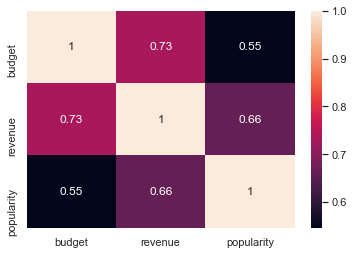

In [486]:
#plotting a heatmap for the correlation matrix
sns.heatmap(corrMatrix, annot=True)
sns.set_theme()
sns.set_context("notebook", font_scale=1)
ax.set_title('Heatmap showing the correlations among Budget, Popularity and Revenue')



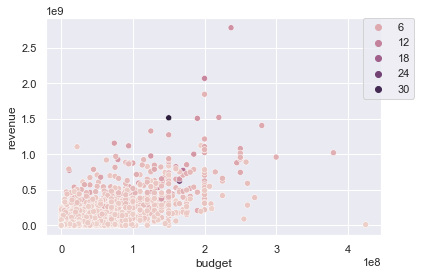

In [491]:
#Visualizing the correlation between variables in a scatterplot
sns.scatterplot(data=dcm,x="budget",y="revenue", hue='popularity')
sns.set_theme()
sns.set_context("notebook", font_scale=1)
ax.set_title('Scatterplot with the relation between budget revenue and popularity')


plt.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0)


In [125]:
#Analyse the relation between low revenue and the film director
lowrevenue['director'].describe()

count            8089
unique           4672
top       Woody Allen
freq               34
Name: director, dtype: object

In [126]:
#Analyse the relation between low revenue and the film director
highrevenue['director'].describe()


count                 2711
unique                1134
top       Steven Spielberg
freq                    26
Name: director, dtype: object

<a id='conclusions'> </a>
## Conclusions

>I've have analysed two questions. The answer to the first question 'What genres are popular from year to year?' can be easily visualized on a histogram.I also used a line chart to get an overview of how the genres popularity changed over the years, I think this chart answers the requirement of one dependent variable and two independent variables.Alongside I also investigated what is the most popular movie for the time period considered wich is "Jurassic World".Curiosly the movie with the highest popularity value in this dataset, does not correspond to the movie with highest revenue which is "Avatar". Also verified the value counts for the genres in the overall period, which can be visualize on a bar chart, Drama seems to be the most common genre attributed to movies.

> The second question 'What kinds of properties are associated with movies that have high revenues?', I've choosen to focus on three properties 'budget', 'popularity' and film 'director'. I came to the conclusion through a correlation matrix that revenue and budget have a strong  positive correlation, stronger than popularity and revenue.This is also visible on scatter plot. is al Concerning the director relationship with high and low revenue, I've started by  dividing the inital dataframe into lowrevenue and highrevenue dataframe, setting the limits on percentile 75. I came to the conclusion by the data statistics that  Woody Allen movies have a 40% chance of being lowrevenue. On the other hand Steven Spielberg movies have a 90% chance of being on the high revenue range.

>Data analysis limitations: Some movies (23)were excluded from the data analysis because they did not have a value for genres.However about 42 movies in the dataset were considered although do not have a value for the director.
I've only analysed the relation between budget, revenue, popularity, director other properties could be analysed for a relationship with highrevenue and lowrevenue.

>References:https://pandas.pydata.org/docs/

In [493]:
from notebooktoall.transform import transform_notebook
transform_notebook(ipynb_file='Investigate_a_Dataset.ipynb', export_list=['html', 'py'])